In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/watson_healthcare_modified.csv")

In [ ]:
data

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [ ]:
def co(d):
  for i in d:
    print(i,':',d[i].unique())

In [ ]:
def co1(d):
  for i in d:
    print(i)

In [ ]:
co(data)

EmployeeID : [1313919 1200302 1060315 ... 1812428 1812429 1152329]
Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : ['No' 'Yes']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 

In [ ]:


data.drop(['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeID'], axis=1, inplace=True)


In [ ]:
co(data)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : ['No' 'Yes']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  

In [ ]:
encoder = LabelEncoder()
data['Attrition'] = encoder.fit_transform(data['Attrition'])
data['OverTime'] = encoder.fit_transform(data['OverTime'])
data['Gender'] = encoder.fit_transform(data['Gender'])


<ipython-input-12-6bdd75124950>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
<ipython-input-12-6bdd75124950>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


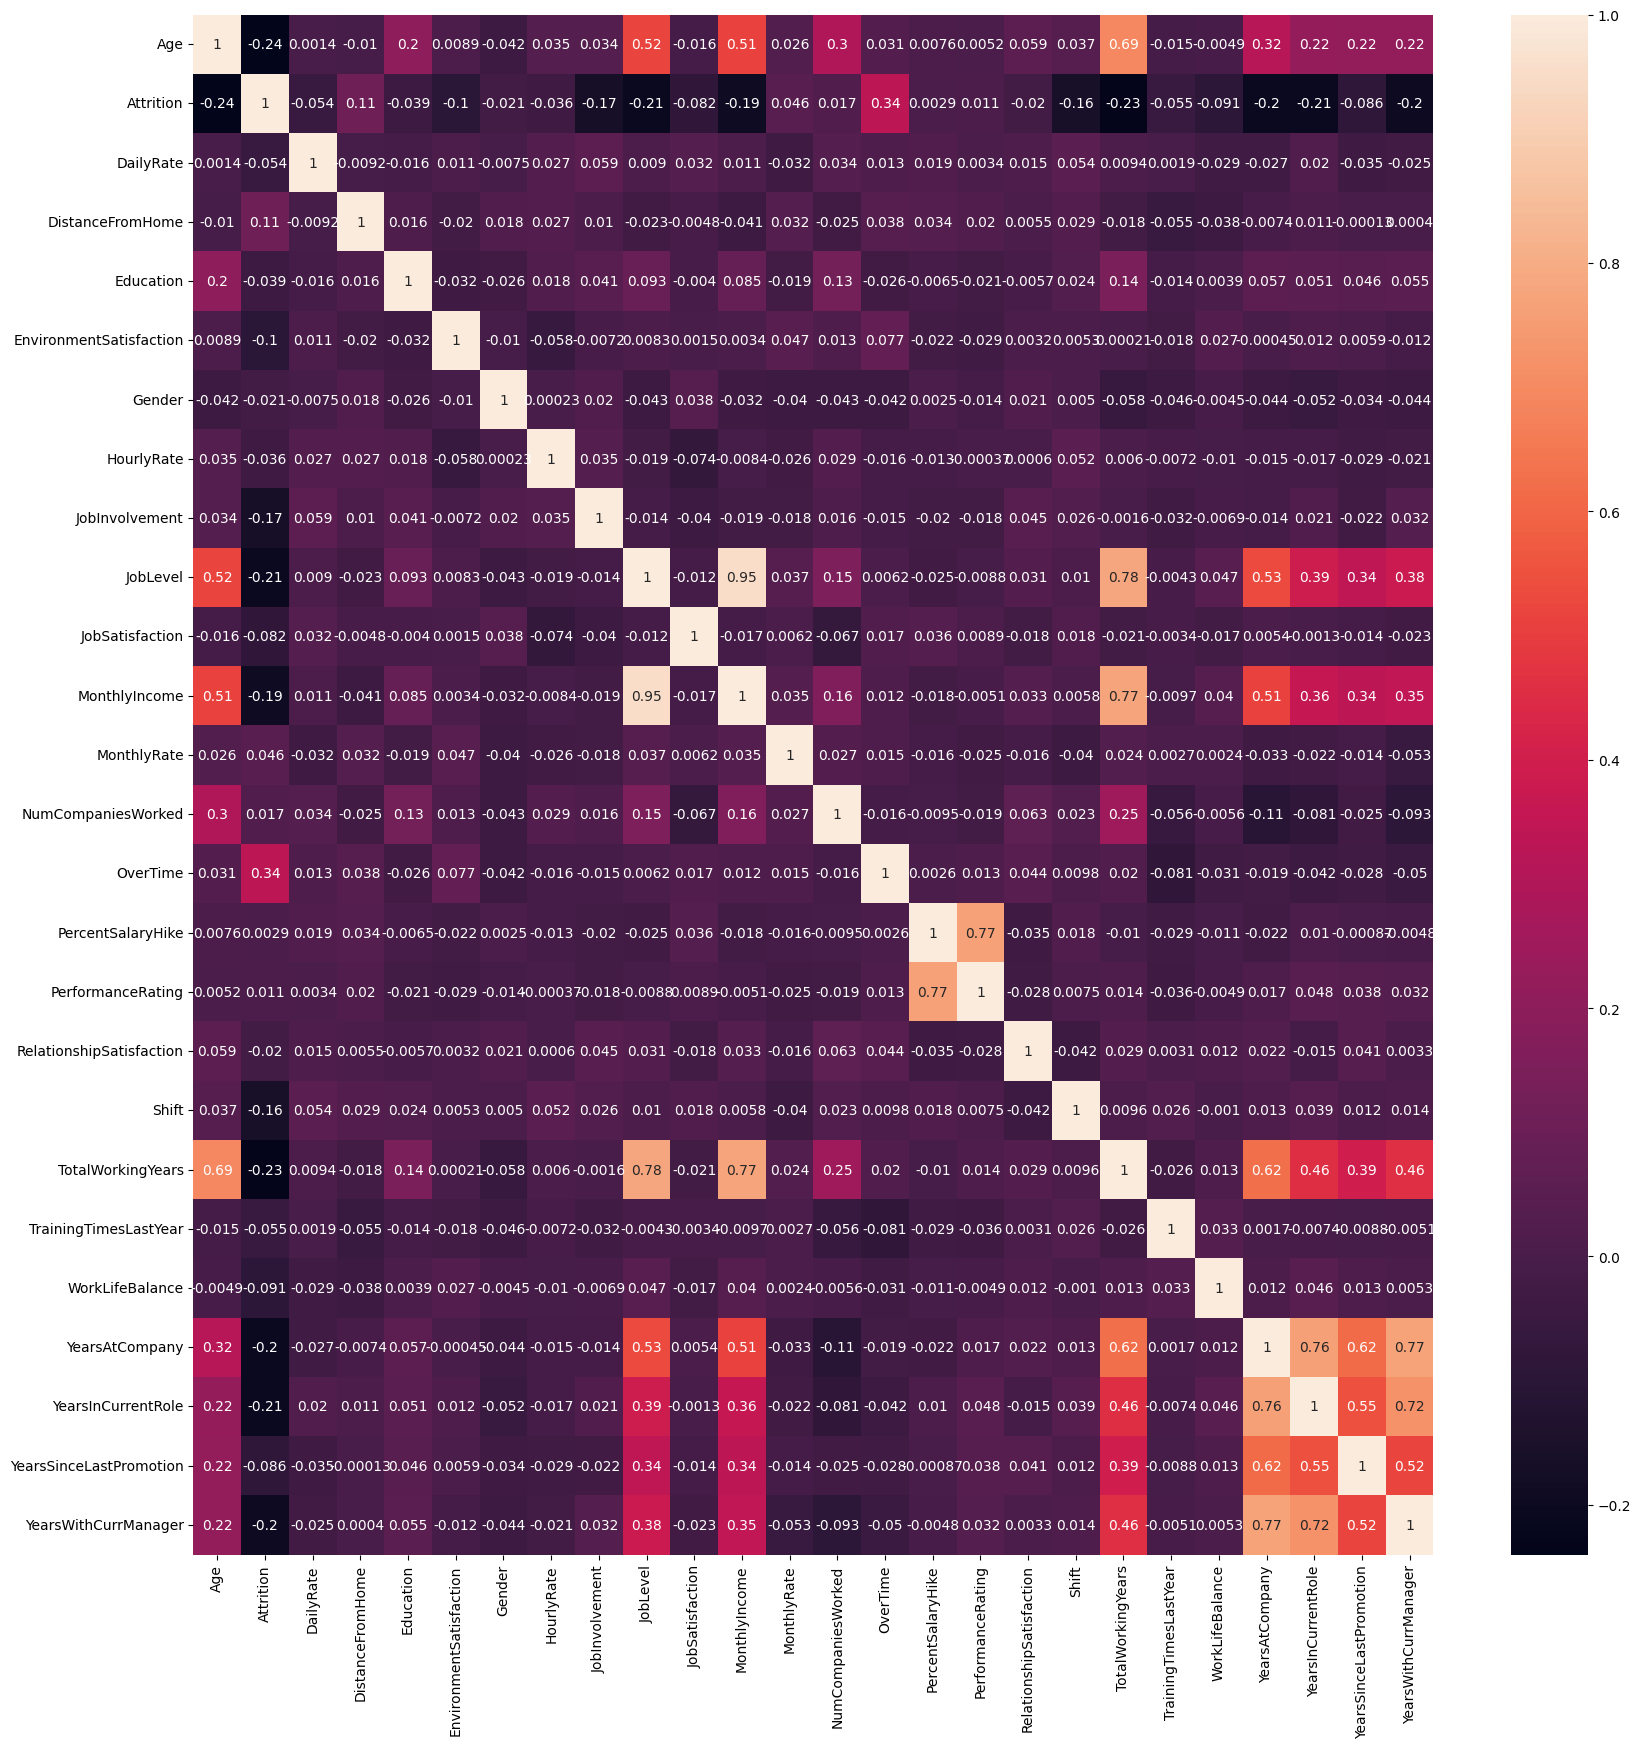

In [ ]:
# prompt: find correlation between them DailyRate , MonthlyRate, MonthlyIncome, HourlyRate and show on heat map

data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()


In [ ]:
data.drop("YearsWithCurrManager", axis = 1, inplace = True)

In [ ]:
data.drop('JobLevel', axis = 1, inplace = True)

<ipython-input-15-c87266e2151c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
<ipython-input-15-c87266e2151c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


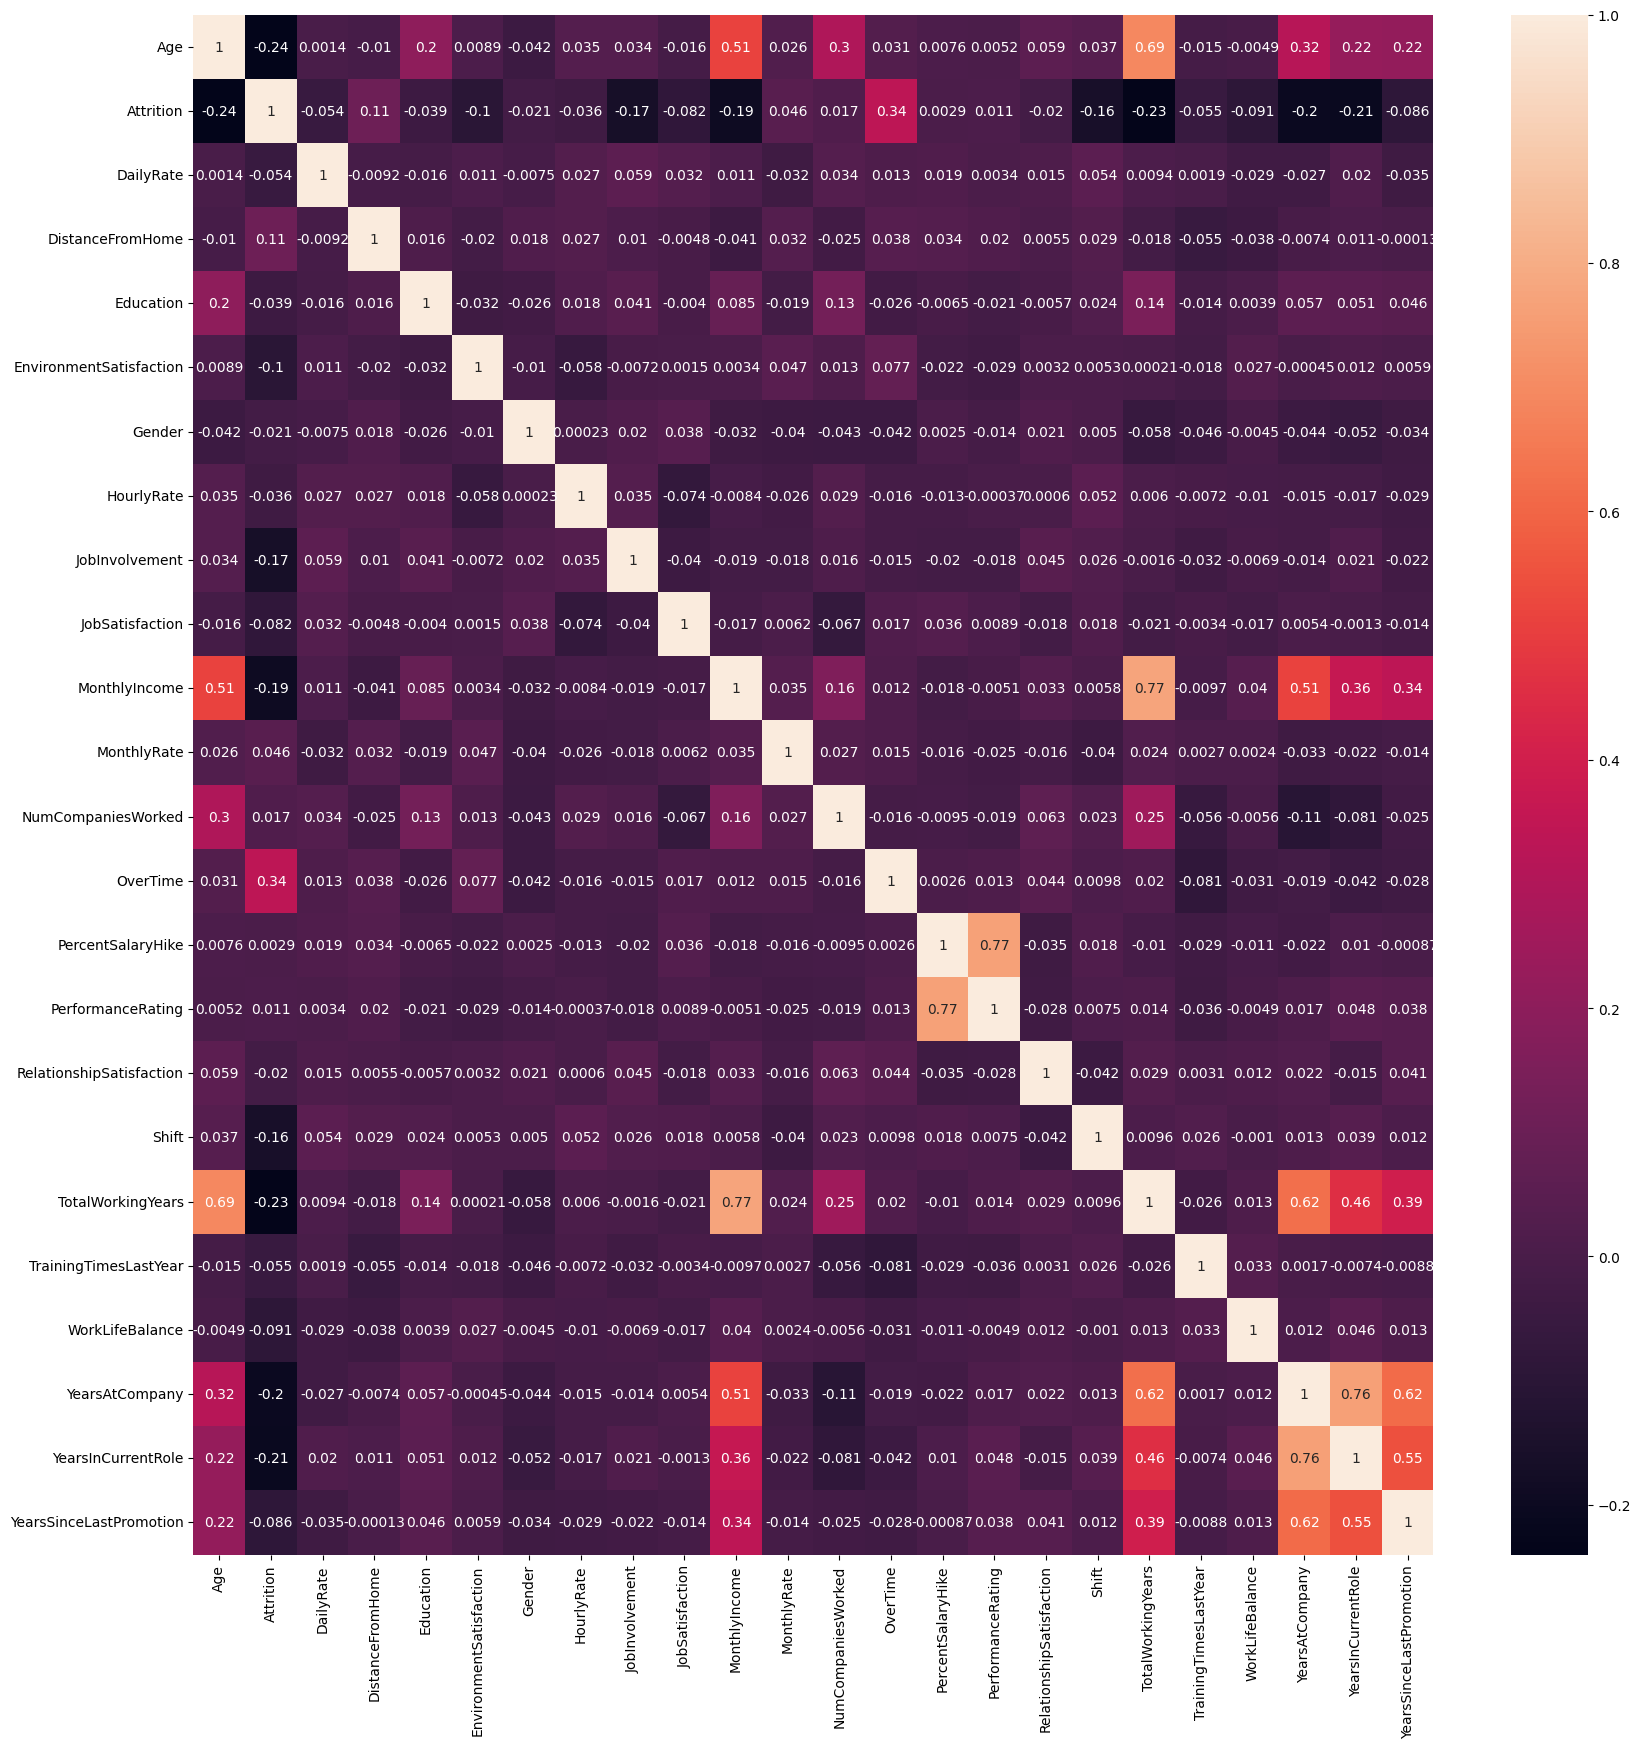

In [ ]:
data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   Attrition                 1676 non-null   int64 
 2   BusinessTravel            1676 non-null   object
 3   DailyRate                 1676 non-null   int64 
 4   Department                1676 non-null   object
 5   DistanceFromHome          1676 non-null   int64 
 6   Education                 1676 non-null   int64 
 7   EducationField            1676 non-null   object
 8   EnvironmentSatisfaction   1676 non-null   int64 
 9   Gender                    1676 non-null   int64 
 10  HourlyRate                1676 non-null   int64 
 11  JobInvolvement            1676 non-null   int64 
 12  JobRole                   1676 non-null   object
 13  JobSatisfaction           1676 non-null   int64 
 14  MaritalStatus           

In [ ]:
data = pd.get_dummies(data, columns = ['MaritalStatus','Department'])

In [ ]:
co(data)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : [0 1]
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 149

In [ ]:
data['JobRole'] = encoder.fit_transform(data['JobRole'])
data['EducationField'] = encoder.fit_transform(data['EducationField'])
data['BusinessTravel'] = encoder.fit_transform(data['BusinessTravel'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1676 non-null   int64
 1   Attrition                 1676 non-null   int64
 2   BusinessTravel            1676 non-null   int64
 3   DailyRate                 1676 non-null   int64
 4   DistanceFromHome          1676 non-null   int64
 5   Education                 1676 non-null   int64
 6   EducationField            1676 non-null   int64
 7   EnvironmentSatisfaction   1676 non-null   int64
 8   Gender                    1676 non-null   int64
 9   HourlyRate                1676 non-null   int64
 10  JobInvolvement            1676 non-null   int64
 11  JobRole                   1676 non-null   int64
 12  JobSatisfaction           1676 non-null   int64
 13  MonthlyIncome             1676 non-null   int64
 14  MonthlyRate               1676 non-null 

In [ ]:
co(data)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : [0 1]
BusinessTravel : [2 1 0]
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452 

In [ ]:


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Age',
'BusinessTravel',
'DailyRate',
'DistanceFromHome',
'Education',
'EducationField',
'EnvironmentSatisfaction',
'HourlyRate',
'JobInvolvement',
'JobRole',
'JobSatisfaction',
'MonthlyIncome',
'MonthlyRate',
'NumCompaniesWorked',
'PercentSalaryHike',
'PerformanceRating',
'RelationshipSatisfaction',
'Shift',
'TotalWorkingYears',
'TrainingTimesLastYear',
'WorkLifeBalance',
'YearsAtCompany',
'YearsInCurrentRole',
'YearsSinceLastPromotion']] = scaler.fit_transform(data[['Age',
'BusinessTravel',
'DailyRate',
'DistanceFromHome',
'Education',
'EducationField',
'EnvironmentSatisfaction',
'HourlyRate',
'JobInvolvement',
'JobRole',
'JobSatisfaction',
'MonthlyIncome',
'MonthlyRate',
'NumCompaniesWorked',
'PercentSalaryHike',
'PerformanceRating',
'RelationshipSatisfaction',
'Shift',
'TotalWorkingYears',
'TrainingTimesLastYear',
'WorkLifeBalance',
'YearsAtCompany',
'YearsInCurrentRole',
'YearsSinceLastPromotion']])
data.head()


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Cardiology,Department_Maternity,Department_Neurology
0,0.547619,0,1.0,0.715820,0.000000,0.25,0.2,0.333333,0,0.914286,...,0.000000,0.15,0.222222,0.000000,0,0,1,1,0,0
1,0.738095,0,0.5,0.126700,0.250000,0.00,0.2,0.666667,1,0.442857,...,0.666667,0.25,0.388889,0.066667,0,1,0,0,1,0
2,0.452381,1,1.0,0.909807,0.035714,0.25,0.8,1.000000,1,0.885714,...,0.666667,0.00,0.000000,0.000000,0,0,1,0,1,0
3,0.357143,0,0.5,0.923407,0.071429,0.75,0.2,1.000000,0,0.371429,...,0.666667,0.20,0.388889,0.200000,0,1,0,0,1,0
4,0.214286,0,1.0,0.350036,0.035714,0.00,0.6,0.000000,1,0.142857,...,0.666667,0.05,0.111111,0.133333,0,1,0,0,1,0


In [ ]:
X = data.drop('Attrition', axis = 1)
y = data['Attrition']

In [ ]:
X.shape, y.shape

((1676, 32), (1676,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
model = keras.Sequential([keras.layers.Flatten(),
    keras.layers.Dense(64, input_shape = (32,), activation = "LeakyReLU"),
                            keras.layers.Dense(128, activation = "LeakyReLU"),
                            keras.layers.Dense(128, activation = "LeakyReLU"),
                            keras.layers.Dense(64, activation = 'LeakyReLU'),
                            keras.layers.Dense(32, activation = "LeakyReLU"),
                            keras.layers.Dense(2, activation = "sigmoid")])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 100)


Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 0.3849 - accuracy: 0.8568
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.8934
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9105
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9088
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9224
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9301
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.1705 - accuracy: 0.9395
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9386
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9395
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 0.1464 - accuracy: 0.9454
Epoch 11/

In [ ]:
model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.7084 - accuracy: 0.8966


[0.7084017992019653, 0.8966202735900879]

In [ ]:
y_test_pre = model.predict(X_test)


16/16 [==============================] - 0s 1ms/step


In [ ]:
y_test_pre[0]

array([9.9999982e-01, 2.0707435e-05], dtype=float32)

In [ ]:
np.argmax(y_test_pre[10])

0

In [ ]:
df = []
for i in y_test_pre:
     x =(np.argmax(i))
     df.append(x)

In [ ]:
y_pre = np.array(df)

In [ ]:
y_pre[10]

0

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_pre)
type(cm)

tensorflow.python.framework.ops.EagerTensor

<Axes: >

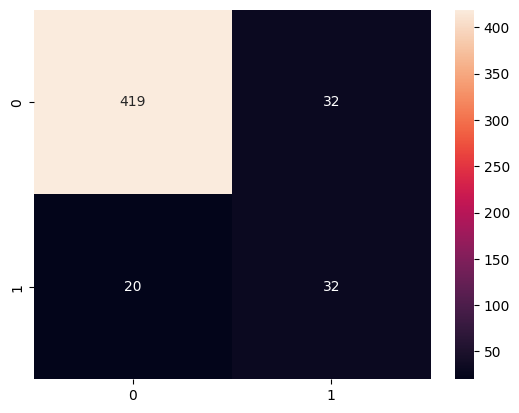

In [ ]:

sns.heatmap(cm, annot = True, fmt = "d")

In [ ]:
# prompt: add dropout layer in above model

model1 = keras.Sequential([ keras.layers.Flatten(),
                            keras.layers.Dense(64, input_shape = (32,), activation = "LeakyReLU"),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "LeakyReLU"),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "LeakyReLU"),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(64, activation = 'LeakyReLU'),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(32, activation = "LeakyReLU"),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(2, activation = "sigmoid")
                          ])

model1.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model1.fit(X_train, y_train, epochs = 100)


Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.3751 - accuracy: 0.8730
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.8841
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9011
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9028
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9079
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9045
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9190
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9224
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9233
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9207
Epoch 11/